In [1]:
import nlu
import os
import numpy as np 
import pandas as pd 

# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
import warnings

In [2]:
df = pd.read_csv("data/combined.csv")

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
df.head()

,rating,pros,rating.1,cons
0,4.7,"[ ' working ' , ' hoursholidaysholidays ' , ' ...",4.7,"[ ' working ' , ' hoursholidaysholidays ' , ' ..."
1,4.9,"[ ' corporate ' , ' culturecorporate ' , ' cul...",5.0,"[ ' salary ' , ' system ' , ' 80 ' , ' ' , ' '..."
2,5.0,"[ ' corporate ' , ' culturecorporate ' , ' cul...",5.0,"[ ' welfare ' , ' ' , ' ' , ' ' , ' good ' , '..."
3,3.8,"[ ' office ' , ' environment ' , ' ' , ' moved...",2.8,"[ ' working ' , ' hoursholiday ' , ' leave ' ,..."
4,4.5,"[ ' working ' , ' hoursholidaysholidaysholiday...",4.7,"[ ' working ' , ' hoursholidaysholidays ' , ' ..."


## Emotion analysis
### Pros

22/08/21 19:36:55 WARN Utils: Your hostname, HITOMIs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.84.21 instead (on interface en0)
22/08/21 19:36:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/hitomihoshino/.ivy2/cache
The jars for the packages stored in: /Users/hitomihoshino/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-3a0f89cf-5ed3-4537-bd2a-dc4ad98a1e14;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.0.2 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.code.findbugs#annotations;3.0.1 in central
	found net.jcip#jcip-annotations;1.0 in central
	found com.google.code.findbugs#jsr305;3.0.1 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.p

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[ / ]classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
Download done! Loading the resource.
[ | ]

2022-08-21 19:37:22.115163: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ / ]tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
Download done! Loading the resource.
[OK!]


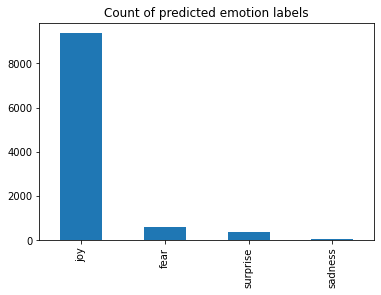

In [5]:
em_pros = nlu.load('emotion').predict(df['pros'],output_level='document')
em_pros['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')
plt.savefig('images/em_pro_bar.jpg', bbox_inches='tight')

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


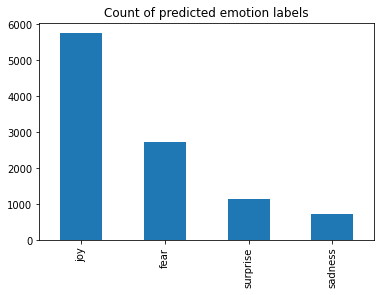

In [6]:
em_cons = nlu.load('emotion').predict(df['cons'],output_level='document')
em_cons['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')
plt.savefig('images/em_con_bar.jpg', bbox_inches='tight')

## Sentiment

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[ | ]sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[ / ]Download done! Loading the resource.
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[ | ]glove_100d download started this may take some time.
Approximate size to download 145.3 MB
Download done! Loading the resource.
[OK!]


<AxesSubplot:title={'center':'Count of predicted sentiment labels'}>

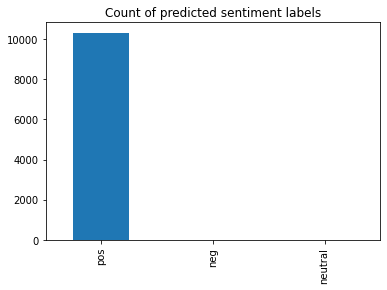

In [7]:
senti_pros = nlu.load('sentiment').predict(df['pros'],output_level='document')
senti_pros['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

In [ ]:
senti_cons = nlu.load('sentiment').predict(df['cons'],output_level='document')
senti_cons['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
# df['emotion'] = em_cons['emotion']
# df['sentiment'] = senti_cons['sentiment']

df['emotion+'] = em_pros['emotion']
df['sentiment+'] = senti_pros['sentiment']
df['emotion-'] = em_cons['emotion']
df['sentiment-'] = senti_cons['sentiment']

In [ ]:
em_senti = df.loc['emotion+': 'sentiment+']

In [ ]:
em_senti = pd.get_dummies(em_senti, prefix = ['emotion+', 'sentiment+'], columns = ['emotion+', 'sentiment+'])

In [ ]:
data = {'em': ['joy', 'surprise', 'sadness','fear'], 
       'pos': [8946, 390, 35, 511], 
       'neutral': [33, 4, 6, 0],
       'negative': [297, 64, 28, 34]}

In [ ]:
data=pd.DataFrame(data)

In [ ]:
# plt.figure(figsize = (10,10))

# sns.heatmap(data, 
# #             mask = mask,
#             annot=True, 
# #             cmap = 'RdPu_r',
# #             cmap = 'cool_r',
#             vmax=1,
#             vmin=-1,
#             linewidths=.5,
#             robust=True)

In [ ]:
fear_x_neg = df[(df['emotion-'] == 'fear') & (df['sentiment-'] == 'neg')]
fear_x_pos = df[(df['emotion-'] == 'fear') & (df['sentiment-'] == 'pos')]
fear_x_neutral = df[(df['emotion-'] == 'fear') & (df['sentiment-'] == 'neutral')]
joy_x_neg = df[(df['emotion-'] == 'joy') & (df['sentiment-'] == 'neg')]
joy_x_neutral = df[(df['emotion-'] == 'joy') & (df['sentiment-'] == 'neutral')]
joy_x_pos = df[(df['emotion-'] == 'joy') & (df['sentiment-'] == 'pos')]
surprise_x_pos = df[(df['emotion-'] == 'surprise') & (df['sentiment-'] == 'pos')]
surprise_x_neg = df[(df['emotion-'] == 'surprise') & (df['sentiment-'] == 'neg')]
surprise_x_neutral = df[(df['emotion-'] == 'surprise') & (df['sentiment-'] == 'neutral')]
sadness_x_pos = df[(df['emotion-'] == 'sadness') & (df['sentiment-'] == 'pos')]
sadness_x_neg = df[(df['emotion-'] == 'sadness') & (df['sentiment-'] == 'neg')]
sadness_x_neutral = df[(df['emotion-'] == 'sadness') & (df['sentiment-'] == 'neutral')]

In [ ]:
fear_x_neg = df[(df['emotion+'] == 'fear') & (df['sentiment+'] == 'neg')]
fear_x_pos = df[(df['emotion+'] == 'fear') & (df['sentiment+'] == 'pos')]
fear_x_neutral = df[(df['emotion+'] == 'fear') & (df['sentiment+'] == 'neutral')]
joy_x_neg = df[(df['emotion+'] == 'joy') & (df['sentiment+'] == 'neg')]
joy_x_neutral = df[(df['emotion+'] == 'joy') & (df['sentiment+'] == 'neutral')]
joy_x_pos = df[(df['emotion+'] == 'joy') & (df['sentiment+'] == 'pos')]
surprise_x_pos = df[(df['emotion+'] == 'surprise') & (df['sentiment+'] == 'pos')]
surprise_x_neg = df[(df['emotion+'] == 'surprise') & (df['sentiment+'] == 'neg')]
surprise_x_neutral = df[(df['emotion+'] == 'surprise') & (df['sentiment+'] == 'neutral')]
sadness_x_pos = df[(df['emotion+'] == 'sadness') & (df['sentiment+'] == 'pos')]
sadness_x_neg = df[(df['emotion+'] == 'sadness') & (df['sentiment+'] == 'neg')]
sadness_x_neutral = df[(df['emotion+'] == 'sadness') & (df['sentiment+'] == 'neutral')]

In [ ]:
print(len(joy_x_neg))
print(len(joy_x_pos))
print(len(joy_x_neutral))

In [ ]:
print(len(surprise_x_neg))
print(len(surprise_x_pos))
print(len(surprise_x_neutral))

In [ ]:
print(len(sadness_x_neg))
print(len(sadness_x_pos))
print(len(sadness_x_neutral))

In [ ]:
print(len(fear_x_neg))
print(len(fear_x_pos))
print(len(fear_x_neutral))

In [ ]:
data1 = {'em': ['joy', 'surprise', 'sadness','fear'], 
       'pos': [2443,414,610,1472], 
       'neutral': [138,24,23,132],
       'negative': [1907,751,760,1674]}

In [ ]:
data1=pd.DataFrame(data1)

In [ ]:
data1

In [ ]:
df.to_csv('data/nlp.csv')